## Dining Guide: Personalized Restaurant Recommendations

Group Members

* Wendy Muturi
* Mulei Mutuku
* Margaret Mitey
* Jeff Kiarie
* Linus Gichuhi
* Joshua Ooko

## Business Understanding

### Introduction

In an age where culinary diversity and dining out have become integral parts of our social fabric, choosing the perfect restaurant can be both exciting and overwhelming. With an abundance of dining options ranging from quaint bistros to exotic eateries, making a dining decision has never been more challenging.
Traditional restaurant websites have long relied on filters based on amenities, location, or cuisine types, providing users with a plethora of options to sift through. However, as the restaurant industry evolves and culinary landscapes expand, the need for a more refined and personalized approach to restaurant discovery has become evident.
Enter the era of restaurant recommendation systems—a technological marvel that goes beyond the mundane task of filtering restaurants based on their amenities. These systems leverage the power of data science, machine learning, and user preferences to deliver tailored dining suggestions that match your unique tastes and preferences.

In a world where time is precious and choices are abundant, restaurant recommendation systems offer an invaluable solution by enhancing the dining experience in ways that traditional filters simply cannot.
This project delves into the world of restaurant recommendation systems, exploring their importance, functionality, and the transformative impact they have on the way we discover and enjoy culinary delights.
We will unveil how these intelligent algorithms are reshaping the gastronomic landscape, catering to the ever-evolving preferences of diners and revolutionizing the art of restaurant selection. Join us on this journey as we unravel the magic of restaurant recommendation systems, offering a taste of the future of dining exploration.


### Problem Statement

This project aims to address the challenge faced by individuals in making informed choices about restaurants and dining experiences by developing a user-friendly restaurant recommendation system that empowers individuals to make informed dining decisions, ultimately enhancing their overall restaurant experience.


### Main Objective

To develop an interactive and user-friendly restaurant recommendation system.

### Specific Objective

Analyze key factors for restaurant ratings, identifying and evaluating the key attributes and factors that significantly influence restaurant ratings and customer preferences using data analysis techniques. 

Develop content-based recommendation algorithms, creating and implementing advanced content-based on algorithms that can generate personalized restaurant recommendations based on user-defined text, restaurant names, and other user preferences. 

Integrate interactive maps to create an interactive mapping feature within the recommendation system. This map will allow users to explore geographic trends in restaurant recommendations, providing a visually engaging way to discover dining options based on location.

Build an interactive user interface that allows users to easily access and interact with the restaurant recommendation system.

### Metric of Success

To consider our project successful, we will focus on the following key metrics:

Our model should effectively address the "cold start problem," ensuring that it can provide meaningful recommendations even for new users or restaurants without extensive review data. 
Expanding the geographical coverage of our system is another metric. Success is when users from various regions and cities can access relevant restaurant recommendations.
The successful deployment of our recommendation model is a critical metric. It should be accessible to users, responsive, and capable of generating real-time recommendations. 



## Data Understanding


The dataset used in this project, was extracted from the Yelp Restaurant [database](https://www.yelp.com/dataset), which is publicly available and contains a large number of reviews across various restaurants and locations. The dataset contains 908,915 tips/reviews by 1,987,897 users on the  131,930 businesses and their attributes like hours, parking, availability, and ambience aggregated check-ins over time for each. The **dataset contains five jason files namely business.json, checkin.json, review.json, tips.json and user.json**, but only two files were found to containe the relevant required information;
> **business.json**: this json file has data on various business all spread over different US states and their relevant attributes.

> **review.json**: this json file contains information on reviews made by different users on various business they were served.

Due to the dataset being large we have only extracted 54,380 rows and 14 columns which are enough for our analysis and the two above stated json files were merged and only the relevant columns were maintained, named;



- **user_id:** A unique identifier for each user who submitted a review

- **business_id:** A unique identifier for each business being reviewed

- **name:** string, the business's name

- **address:** string, the full address of the business 

- **stars:** The rating given by the user in terms of stars (e.g., 1.0, 2.0, 3.0, 4.0, 5.0),

- **text:** The actual text content of the review and

- **review_count:** number of reviews the business has received

- **city:** string, the city eg "San Francisco",
 
- **state:** string, 2 character state code, if applicable eg"CA",

- **latitude:**  float, latitude of the business

- **longitude:** float, longitude of the business

- **attributes:** business attributes and features

- **categories:** a list of the business categories

- **hours:** hours in when the business is open,hours are using a 24hr clock



For download of the dataset's, view the [Link](https://www.yelp.com/dataset) anf for complete [documentation](https://www.yelp.com/dataset/documentation/main) of all the datasets.

The information contained in this dataset, about business attributes and user reviews, will be used to train models in development of the restaurant reccommendation system.


In [ ]:
# importing necesarry packages

import collections
import folium
import json 
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import string
import pickle
from surprise import Reader , Dataset
from tabulate import tabulate
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import SVD
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic, KNNBaseline
from surprise.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud

# plotting styles
plt.style.use("fivethirtyeight")
%matplotlib inline

> Due to the vast/large nature of our dataset we will only extract a subset of the whole dataset (54,380 entries) from the **business.json** and **review.json**n files for use in our analysis.

In [ ]:
# reading and extracting data from the business.json file

json_data = []
lines_to_read = 54380 # Set the number of lines to read

# Open the JSON file and parse each line up to the specified limit
with open('./data/yelp_academic_dataset_business.json', 'r') as file:
    for i, line in enumerate(file):  # looping over the file entries
        if i >= lines_to_read:       # stopping when the number of required lines are met
            break
        json_object = json.loads(line) 
        json_data.append(json_object)

# converting the json_data list into a pandas dataframe
business = pd.DataFrame(json_data)

# saving the file for future easier retreival
business.to_csv(filepath='./data/business.csv',index=False)

In [ ]:
# reading and extracting data from the review.json file

json_data = []
lines_to_read = 54380  # Set the number of lines to read

# Open the JSON file and parse each line up to the specified limit
with open('./data/yelp_academic_dataset_review.json', 'r') as file:
    for i, line in enumerate(file):  # looping over the file entries
        if i >= lines_to_read:       # stopping when the number of required lines are met
            break
        json_object = json.loads(line)
        json_data.append(json_object)

# converting the json_data list into a pandas dataframe
review = pd.DataFrame(json_data)

# saving the file for future easier retreival
review.to_csv(filepath='./data/review.csv',index=False)

> Loading the extracted data

In [ ]:
# loading the businesses dataset
business= pd.read_csv("./data/business.csv")
# previewing the datasetdata.loc[ data.categories.str.contains('Restaurants')]
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [ ]:
# viewing the datasets features/columns
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54380 entries, 0 to 54379
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   54380 non-null  object 
 1   name          54380 non-null  object 
 2   address       52551 non-null  object 
 3   city          54380 non-null  object 
 4   state         54380 non-null  object 
 5   postal_code   54360 non-null  object 
 6   latitude      54380 non-null  float64
 7   longitude     54380 non-null  float64
 8   stars         54380 non-null  float64
 9   review_count  54380 non-null  int64  
 10  is_open       54380 non-null  int64  
 11  attributes    49543 non-null  object 
 12  categories    54342 non-null  object 
 13  hours         45975 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 5.8+ MB


In [ ]:
# loading the second dataset review.csv
review=pd.read_csv("./data/review.csv")
# previewing the dataset
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [ ]:
# viewing the datasets features/columns
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54380 entries, 0 to 54379
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    54380 non-null  object 
 1   user_id      54380 non-null  object 
 2   business_id  54380 non-null  object 
 3   stars        54380 non-null  float64
 4   useful       54380 non-null  int64  
 5   funny        54380 non-null  int64  
 6   cool         54380 non-null  int64  
 7   text         54380 non-null  object 
 8   date         54380 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.7+ MB


> After previewing both of the datasets, we now merge them into one dataset, using the **business_id** column as primary key so as to obtain all the feature in one dataset for easier analysis. 

In [ ]:
# merging the two datasets into one using the business_id primary key

data=pd.merge(left=review , right=business, how='left', on='business_id')

# previewing the new merge dataset
data.head()


,review_id,user_id,business_id,stars_x,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_y,review_count,is_open,attributes,categories,hours
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,...,PA,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Body Cycle Spinning Studio,...,PA,19119,39.952103,-75.172753,5.0,144,0,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Active Life, Cycling Classes, Trainers, Gyms, ...","{'Monday': '6:30-20:30', 'Tuesday': '6:30-20:3..."
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,...,AZ,85713,32.207233,-110.980864,3.5,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",NaN
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,...,PA,19114,40.079848,-75.025080,4.0,181,1,"{'Caters': 'True', 'Ambience': ""{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,...,LA,70119,29.962102,-90.087958,4.0,32,0,"{'BusinessParking': ""{'garage': False, 'street...","Sandwiches, Beer, Wine & Spirits, Bars, Food, ...","{'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '..."


In [ ]:
# previewing the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54380 entries, 0 to 54379
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_id     54380 non-null  object 
 1   user_id       54380 non-null  object 
 2   business_id   54380 non-null  object 
 3   stars_x       54380 non-null  float64
 4   useful        54380 non-null  int64  
 5   funny         54380 non-null  int64  
 6   cool          54380 non-null  int64  
 7   text          54380 non-null  object 
 8   date          54380 non-null  object 
 9   name          54380 non-null  object 
 10  address       53926 non-null  object 
 11  city          54380 non-null  object 
 12  state         54380 non-null  object 
 13  postal_code   54380 non-null  object 
 14  latitude      54380 non-null  float64
 15  longitude     54380 non-null  float64
 16  stars_y       54380 non-null  float64
 17  review_count  54380 non-null  int64  
 18  is_open       54380 non-nu

> After merging both the datasets we have obatined a dataframe with 54,380 rows and 21 columns, we then proceed to data preparation for more processing of the dataframe in preparation for analysis.

In [ ]:
data.describe()

,stars_x,useful,funny,cool,latitude,longitude,stars_y,review_count,is_open
count,54380.000000,54380.000000,54380.000000,54380.000000,54380.000000,54380.000000,54380.000000,54380.000000,54380.000000
mean,3.844980,0.890438,0.253567,0.346396,36.050556,-89.005350,3.769796,389.177014,0.766532
std,1.352256,1.866532,1.035998,1.073067,5.289909,14.446695,0.671340,628.925711,0.423041
min,1.000000,0.000000,0.000000,0.000000,27.584300,-120.026076,1.000000,5.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,29.967159,-90.239235,3.500000,61.000000,1.000000
50%,4.000000,0.000000,0.000000,0.000000,38.612534,-86.252569,4.000000,170.000000,1.000000
75%,5.000000,1.000000,0.000000,0.000000,39.946685,-75.325252,4.000000,430.000000,1.000000
max,5.000000,91.000000,98.000000,49.000000,53.644501,-74.658572,5.000000,4554.000000,1.000000


From the above output we can conclude that;
- The avarge rating given by users to different businesses is 3.8 $ \approx$ 4 , with 50% of the ratings being between 3 and 5 rating
- The avarge star rating for the various businesses is 3.7 $ \approx$ 4 , with majority of the businesses having 3.5 and 4 star ratings.
- The avarage number of reviews in our data made by the users regarding different business is 389, with majority of the businesses having reviews between 61 and 430. 

## Data Preparation

In this section, we will perform data cleaning to prepare the dataset for analysis, the various data cleaning methods that are to be used will be;

- Renaming columns
- Checking Dealing with missing data
- Checking and removing duplicates 
- Feature Engineering
- Selecting the Relevant Columns
- Droping Irrelevant columns
- Selecting relevant rows

### Renaming columns

Renaming the **stars_x** and **stars_y** columns into **rating** and **b/s_rating** columns for better understanding

In [ ]:
data.rename(columns={'stars_x':'rating', 'stars_y':'b/s_rating'}, inplace=True)

### Dealing with missing data

Missing values can lead to gaps in your dataset, making it incomplete and potentially unreliable for analysis. By addressing missing values, you ensure that you have a more comprehensive dataset to work with.

In [ ]:
# checking for columns with missing values
data.isna().sum()

review_id          0
user_id            0
business_id        0
rating             0
useful             0
funny              0
cool               0
text               0
date               0
name               0
address          454
city               0
state              0
postal_code        0
latitude           0
longitude          0
b/s_rating         0
review_count       0
is_open            0
attributes       842
categories         2
hours           3101
dtype: int64

> The main columns in our analysis, that will be used to develope the recommendation system are **user_id**, **business_id** and **rating**. Therefore, since the columns that have missing values only provide metadata/ more information about our restaurants i.e **address, attribute, categories** **and hours**, then we will impute the missing values with "Not-Avaliable" since they won't influence our analysis 


In [ ]:
# Imputing missing values in the address column with "Not-Available"
data.address.fillna(value="Not-Available", inplace=True)

In [ ]:
# Imputing missing values in the attributes column with "Not-Available" 
data.attributes.fillna(value="Not-Available", inplace=True)

In [ ]:
# Imputing missing values in the categories column with "Not-Available" 
data.categories.fillna(value="Not-Available", inplace=True)

In [ ]:
# Imputing missing values in the hours column with "Not-Available" 
data.hours.fillna(value="Not-Available", inplace=True)

In [ ]:
# previewing our changes
data.isna().sum()

review_id       0
user_id         0
business_id     0
rating          0
useful          0
funny           0
cool            0
text            0
date            0
name            0
address         0
city            0
state           0
postal_code     0
latitude        0
longitude       0
b/s_rating      0
review_count    0
is_open         0
attributes      0
categories      0
hours           0
dtype: int64

### Dealing with Duplicates

In order to avoid inaccurate insights we have to deal with duplicate data becuase deuplicate data can lead to incorrect or misleading insights.

In [ ]:
# checking for duplicated columns
print("Duplicates: ",data.duplicated().sum())

Duplicates:  0


> - Our data has no duplicates

### Feature Engineering

In feaure engineering, we will combine the **city**, **state**, **address** columns to form one column, **location** column with the intention to perform geospatial analysis or visualization. Having a unified location column simplifies the process and you can use the location column directly to create maps or explore geographic trends.

In [ ]:
# combining the address columns
data['location']=data[['city','state','address']]\
            .apply( lambda x: f"State:{x['state']}, City:{x['city']}, Address:{x['address']} ", axis=1)

# then we drop the combined columns
data.drop(columns=['state', 'city','address'], axis=1, inplace=True)

data.location

0        State:PA, City:North Wales, Address:1460 Bethl...
1        State:PA, City:Philadelphia, Address:1923 Ches...
2        State:AZ, City:Tucson, Address:748 W Starr Pas...
3        State:PA, City:Philadelphia, Address:2481 Gran...
4        State:LA, City:New Orleans, Address:2549 Banks...
                               ...                        
54375       State:ID, City:Boise, Address:590 E Boise Ave 
54376    State:MO, City:Saint Louis, Address:1 S Broadway 
54377    State:CA, City:Santa Barbara, Address:119 E Co...
54378    State:LA, City:New Orleans, Address:1418 Magaz...
54379    State:PA, City:West Chester, Address:1233 W Ch...
Name: location, Length: 54380, dtype: object

> Then we will convert the **user_id** column form string into intergers, by assigning the uniques string ids interger values. This will aid in our modeling process in the later sections.

In [ ]:
# converting the user_id into intergers

# selecting only the uniques user ids as a dataframe
ids=data[['user_id']].drop_duplicates('user_id').reset_index(drop=True).copy()

# resetting the indexes, to include a continous numbering 
ids=ids.reset_index()

# merging the ids dataframe with our original dataframe using the user id column as primary key
# renaming the index column to represent the user ids
data=pd.merge(data,ids, how='left', on='user_id').drop('user_id', axis=1).rename(columns={'index':'user_id'})

# writting a function to order the user ids to start from 1 instead of '0'
def add(x):
    """ adds 1 to the existing user id"""
    y=x+1
    return y
data.user_id=data.user_id.apply(add )  # applyng the function to our user ids
data.head()

,review_id,business_id,rating,useful,funny,cool,text,date,name,postal_code,latitude,longitude,b/s_rating,review_count,is_open,attributes,categories,hours,location,user_id
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Turning Point of North Wales,19454,40.210196,-75.223639,3.0,169,1,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'...","State:PA, City:North Wales, Address:1460 Bethl...",1
1,BiTunyQ73aT9WBnpR9DZGw,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Body Cycle Spinning Studio,19119,39.952103,-75.172753,5.0,144,0,"{'BusinessAcceptsCreditCards': 'True', 'GoodFo...","Active Life, Cycling Classes, Trainers, Gyms, ...","{'Monday': '6:30-20:30', 'Tuesday': '6:30-20:3...","State:PA, City:Philadelphia, Address:1923 Ches...",2
2,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Kettle Restaurant,85713,32.207233,-110.980864,3.5,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",Not-Available,"State:AZ, City:Tucson, Address:748 W Starr Pas...",3
3,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Zaika,19114,40.079848,-75.025080,4.0,181,1,"{'Caters': 'True', 'Ambience': ""{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21...","State:PA, City:Philadelphia, Address:2481 Gran...",4
4,Sx8TMOWLNuJBWer-0pcmoA,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Melt,70119,29.962102,-90.087958,4.0,32,0,"{'BusinessParking': ""{'garage': False, 'street...","Sandwiches, Beer, Wine & Spirits, Bars, Food, ...","{'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '...","State:LA, City:New Orleans, Address:2549 Banks...",5


> Creating a new column called the **price** column from the information contained in  the **attributes column**.

In [ ]:
# creating a function to extract the price values

def Price(val):
    """
    The function takes in a dictionary and extracts the price in the 'RestaurantsPriceRange2' key, else returnsa '0'
    if the value if 'Not-Available'
    """
    # evaluates the attributes values as dictionary because they have the dictionary structure but are of type string
    try:
        p = eval(val)['RestaurantsPriceRange2']    # extracts the price values in the pricerange  key
        return int(p)                              # returns the price as interger
    except:
        return 0                                   # else returns zero if the pricerange key is not listed
    
# applying the function to the attributes column
data['price']=data.attributes.apply(Price)

# previewing the column
data[['price']].head()

,price
0,2
1,0
2,1
3,2
4,2


### Data Spliting

Since our data contains several businesses other than restaurants eg Gyms, Saloons, Hardwares.. , we will only select the businesses that are restaurants. Working with a single business category simplifies the problem complexity and sets us in course with our objective and is essential to obtain relevant findings and recommendations.

In [ ]:
# selecting only the restaurants
data=data.loc[ data.categories.str.contains('Restaurants')].copy().reset_index(drop=True)
data.shape

(39334, 21)

### Droping Irrelevant columns
The columns **review_id , useful , funny , cool , is_open , postal_code and date** are not informative in our analysis and will not be used during analysis, therefore we drop them.

In [ ]:
# droping unrelevant collumn
cols=['review_id', 'useful','postal_code','funny', 'cool', 'is_open', 'date']
data.drop(columns=cols, axis=1, inplace=True)

# confirming the remaining columns
data.columns

Index(['business_id', 'rating', 'text', 'name', 'latitude', 'longitude',
       'b/s_rating', 'review_count', 'attributes', 'categories', 'hours',
       'location', 'user_id', 'price'],
      dtype='object')

## Explatory Data Analysis

#### 1.Distribution of Ratings

1) What are the differences in the distribution of user ratings and business ratings in the dataset and what do these differences indicate about user preferences?

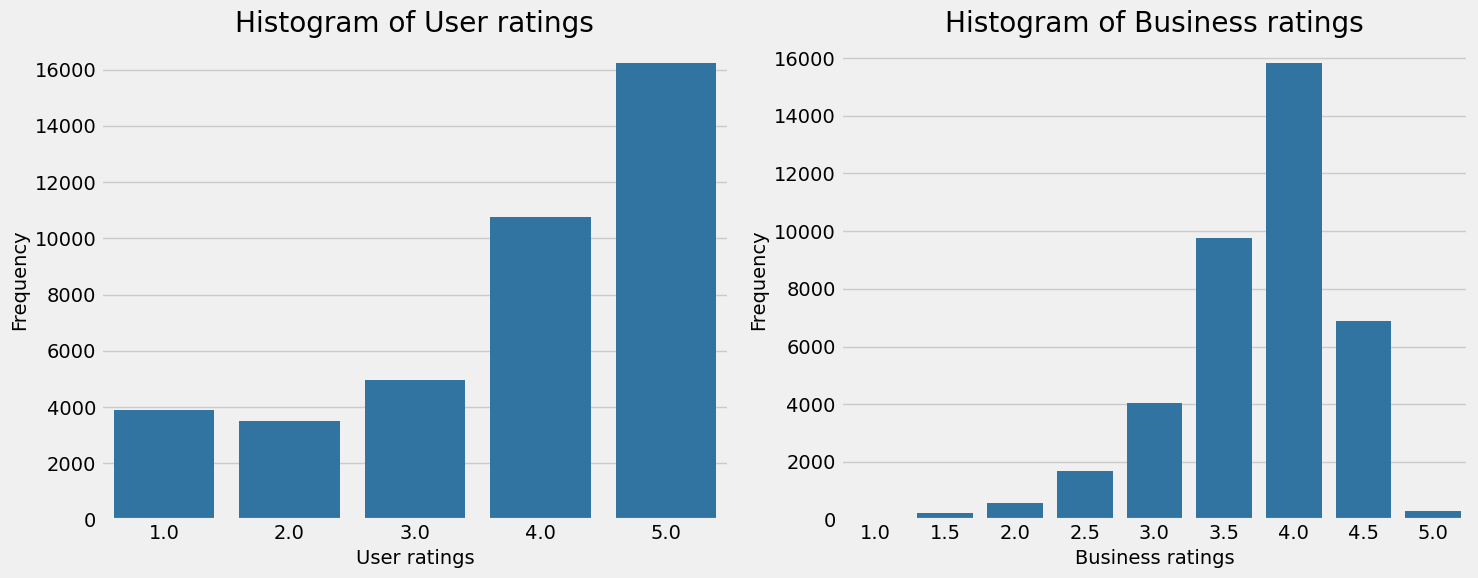

In [ ]:
# Assuming you have a DataFrame named 'df' and two numerical columns 'column1' and 'column2'
column1 = 'rating'
column2 = 'b/s_rating'

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # Adjust the figsize as needed

# Create histograms for column1 and column2
 
sns.countplot(data=data, x=column1 ,ax=axes[0] , color='tab:blue')
# Adjust the number of bins as needed
axes[0].set_xlabel("User ratings")
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Histogram of User ratings')

sns.countplot(data=data, x=column2 ,ax=axes[1] ,color='tab:blue')
  # Adjust the number of bins as needed
axes[1].set_xlabel("Business ratings")
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Histogram of Business ratings')
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
df_1 = data[['rating', 'b/s_rating', 'review_count']]
df_1.corr()

,rating,b/s_rating,review_count
rating,1.000000,0.409173,0.106111
b/s_rating,0.409173,1.000000,0.237139
review_count,0.106111,0.237139,1.000000


**Correlation between Rating and B/S Rating**

Correlation Value: 0.409173 The positive correlation coefficient of approximately 0.41 suggests a moderate positive relationship between the rating of a restaurant or service and its B/S Rating. In other words, as the rating of a business increases, its B/S Rating tends to increase as well. Businesses with higher individual ratings are likely to have a higher overall rating based on user reviews.

**Correlation between Rating and Review Count**

Correlation Value: 0.106111 The correlation coefficient of about 0.11 indicates a weak positive correlation between the rating of a restaurant or service and its review count.This suggests that businesses with higher ratings may have slightly more reviews, but the relationship is not particularly strong.

**Correlation between B/S Rating and Review Count**

Correlation Value: 0.237139 The correlation coefficient of approximately 0.24 suggests a moderate positive correlation between the B/S Rating of a business and its review count. This implies that businesses with higher B/S Ratings tend to have more user reviews. Customers are more likely to review businesses with higher overall ratings, contributing to the positive correlation.

#### 2.Distribution of Categories

1) What are the most prevalent restaurant categories and how does the distribution of these categories impact the restaurant landscape in terms of user preferences and choices?

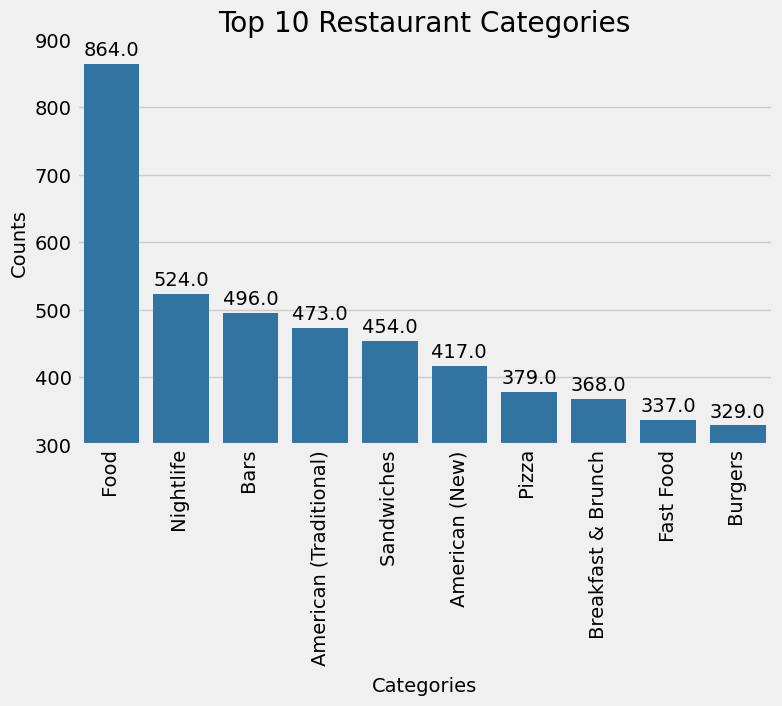

In [ ]:

# list of all categories
categories=[ cat for category in data.drop_duplicates('business_id').categories for cat in category.split(',')]
# list of unique categories only
categories=collections.Counter(categories)
#picking the top 20 categories
common=categories.most_common(12)
# ploting
fig, ax=plt.subplots(figsize=(8,5))
x=[ i[0] for i in common[2:]]
y=[i[1] for i in common[2:]]
sns.barplot(x=x, y=y, color='tab:blue', ax=ax)
ax.set_xlabel("Categories")
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel("Counts")
ax.set_ylim([300,900])
ax.set_title("Top 10 Restaurant Categories");
ax.bar_label( ax.containers[0], padding=3, fmt='{:,}');

The plot of restaurant categories reveals that the dataset predominantly consists of food-related establishments, signifying that restaurants serving a variety of cuisines hold the highest representation. Following closely are nightlife-related venues, suggesting a vibrant nightlife scene in the dataset. Conversely, fast food and burger establishments are among the less frequently occurring categories, indicating their lower prevalence within the dataset.

#### 3 Distribution of Restaurants

##### i)cities

1) What are the most frequently occurring cities and how does the distribution of restaurants in these cities impact users' choices of restaurants?

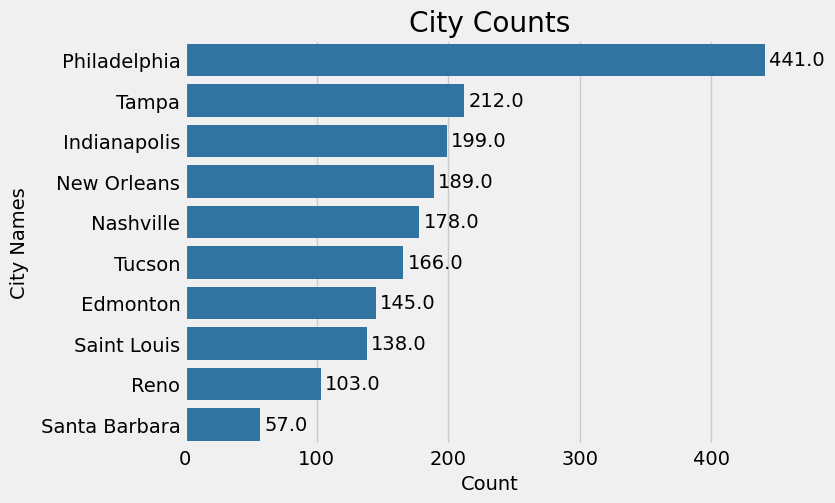

In [ ]:

# extract the location column and drop duplicate business entries
location= data.drop_duplicates('business_id')[['location']]
# split the location string to extract the city part, removing city from each entry
city=location.location.apply(lambda x: x.split(',')[1].replace("City:",'')) 
# count the occurrences of each city and selected the top 10 cities
city=collections.Counter(city)
city=city.most_common(10)
# extract the city names and their respective counts
y=[i[0] for i in city]
x=[i[1] for i in city]
# created a barplot to visualize the city counts
fig, ax=plt.subplots(figsize=(7,5))
sns.barplot( y=y, x=x, color='tab:blue')
ax.set_ylabel("City Names")
ax.set_xlabel("Count")
ax.set_title("City Counts");
ax.bar_label( ax.containers[0],padding=3, fmt='{:,}');

The analysis of restaurant locations reveals that Philadelphia has the highest number of restaurants in the dataset, making it the most prevalent city. Following, but not as closely, is Tampa, indicating a notable restaurant presence. In contrast, the cities of Reno and Santa Barbara have fewer restaurants, making them less common in this dataset.

##### ii) States

2) What are the most common states and how does the distribution of restaurants across these states impact the types of cuisine available and user preferences for dining?

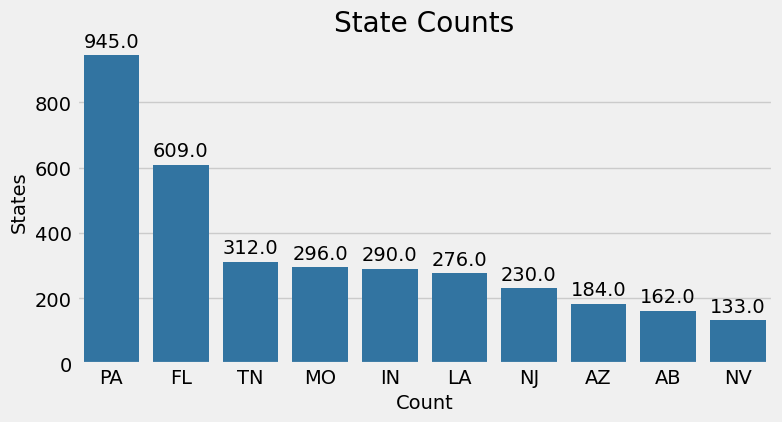

In [ ]:
# extract the location column and split it to obtain the state part
states=location.location.apply(lambda x: x.split(',')[0].replace("State:",'')) 
# count the occurrences of each state and select the top 10 states
states=collections.Counter(states)
states=states.most_common(10)
# extract the state names and their respective counts for visualization
y=[i[0] for i in states]
x=[i[1] for i in states]
# created a barplot to visualize the state counts
fig, ax=plt.subplots(figsize=(8,4))
sns.barplot( y=x,x=y , color='tab:blue')
ax.set_ylabel("States")
ax.set_xlabel("Count")
ax.set_title("State Counts");
ax.bar_label( ax.containers[0],padding=3, fmt='{:,}');

The analysis of restaurant locations by state reveals that Philadelphia has the highest number of restaurants in the dataset, making it the most prevalent state. Following, but not as closely, is Florida, indicating a notable presence of restaurants in that state. In contrast, Alberta and Nevada have fewer restaurants, making them less common in this dataset.

### Popular Restaurants

Analyzing and highlighting the most popular restaurants is essential because it allows us to recognize the establishments that have garnered significant attention and interest from customers. This information will be valuable for consumers seeking highly-rated dining experiences.

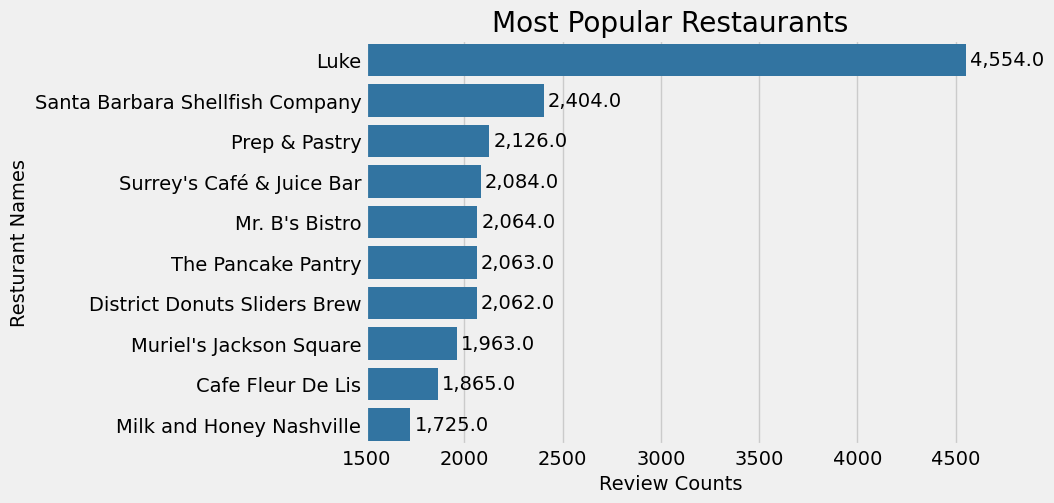

In [ ]:
# most popular restaurants

index=data.drop_duplicates(subset='business_id').sort_values(by=['review_count','b/s_rating'],ascending=False)[:10].index

fig, ax=plt.subplots(figsize=(7,5))
sns.barplot(data=data.loc[index], x="review_count", y='name', color='tab:blue')
ax.set_ylabel("Resturant Names")
ax.set_xlabel("Review Counts")
ax.set_xlim([1500,4600])
ax.set_title("Most Popular Restaurants");
ax.bar_label( ax.containers[0],padding=3, fmt='{:,}');

The output highlights the review counts for the different restaurants in descending order. At the top is Luke with an impressive 4554 reviews, signifying that it has received a substantial amount of customer feedback. Following closely is the Santa Barbara Shellfish Company with a notable 2404 reviews, demonstrating a strong presence and popularity among diners. Cafe Fleur De Lis is the second last on the list, with a still respectable 1865 reviews, though a bit lower than the previous two. Finally, Milk and Honey Nashville rounds out the list with 1725 reviews, indicating a significant number of satisfied patrons. These review counts offer insights into the popularity and customer engagement of these respective restaurants.

For analyzing the relationship between business rating and restaurant price, we will be creating a box plot. A box plot can provide more detailed insights into the distribution of price ranges for different rating categories. 

Number of businesses without price:  127


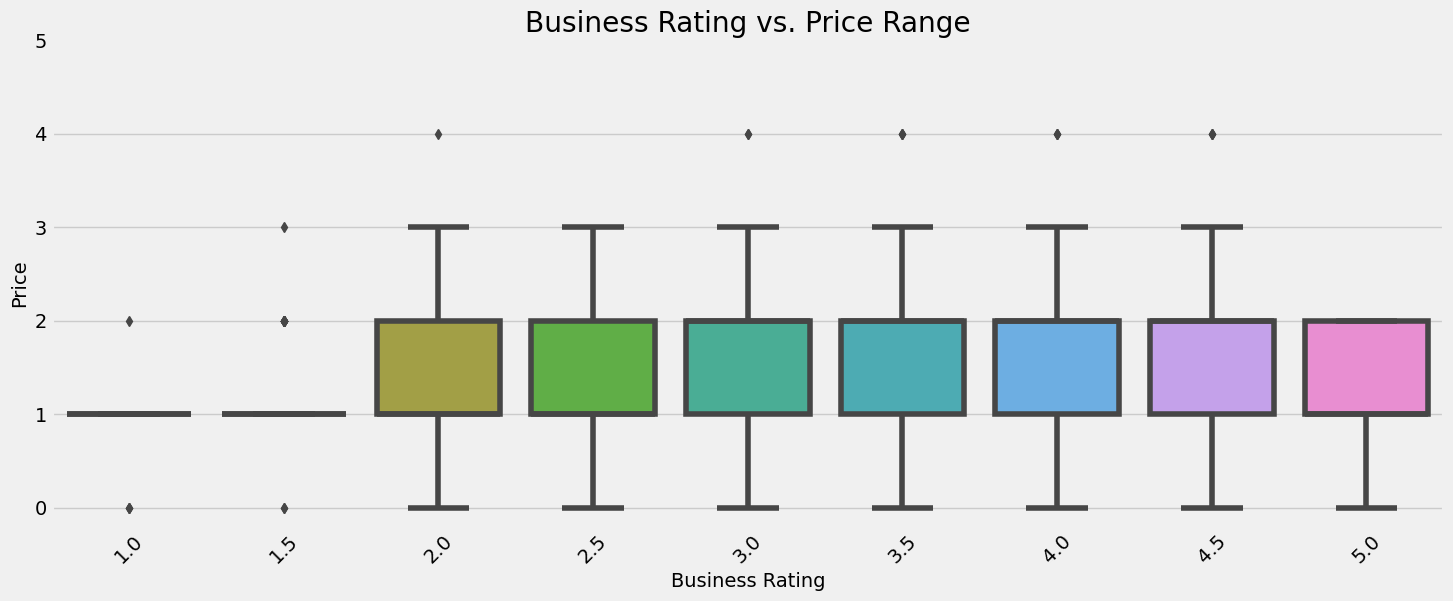

In [ ]:
# Data preprocessing: Drop duplicate businesses and extract prices
df = data.drop_duplicates('business_id')

# Count and print the number of businesses without price information
print("Number of businesses without price: ", sum([1 for i in df.price.values if i == 0]))

# Create a box plot
fig, ax = plt.subplots(figsize=(16, 6))
sns.boxplot(x='b/s_rating', y='price', data=df, ax=ax)
ax.set_xlabel("Business Rating")
ax.set_ylabel("Price")
ax.set_yticks([0, 1, 2, 3, 4, 5])

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Business Rating vs. Price Range")

plt.show()


The number of businesses without price is 127. This indicates that out of the analyzed businesses, 127 have missing or unspecified price information. It's important to note that the central line in each box represents the median price, which is a robust measure of the central tendency of restaurant prices for different rating levels. The vertical span of each box shows the interquartile range, providing insights into the spread or variability of prices within each rating category. 

To visualize the relationship between business rating and the number of reviews more effectively, we will be creating a 2D histogram or a hexbin plot. These plots provide a better representation of the density and concentration of data points. 

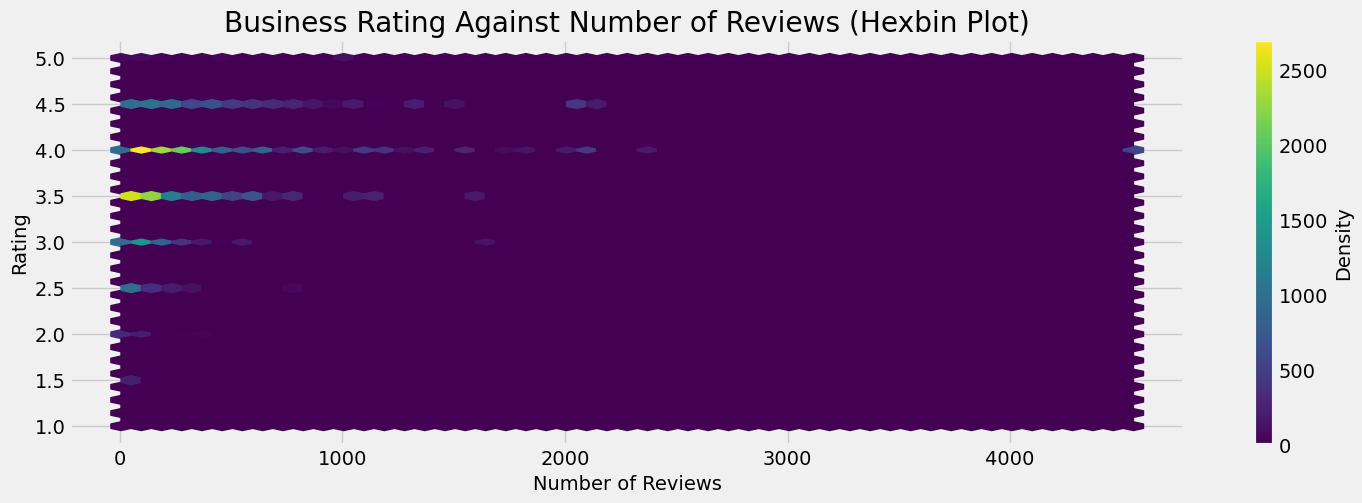

In [ ]:
fig, ax = plt.subplots(figsize=(16,5))

# Create a hexbin plot
hb = ax.hexbin(data['review_count'], data['b/s_rating'], gridsize=50, cmap='viridis')

ax.set_xlabel("Number of Reviews")
ax.set_ylabel("Rating")
ax.set_title('Business Rating Against Number of Reviews (Hexbin Plot)')

# Add a colorbar to indicate the density of points
cb = plt.colorbar(hb)
cb.set_label('Density')


### Review Word Cloud Analysis

To create a word cloud visualization that highlights the most frequent words found in review texts column. By filtering and analyzing the text of positive reviews, the word cloud offers an intuitive and visually appealing way to identify the key themes and frequently mentioned aspects that contribute to a positive customer experience. This visualization provides valuable insights into the factors that most positively influence customer satisfaction, aiding in the understanding of what makes certain businesses successful and well-reviewed on Yelp.

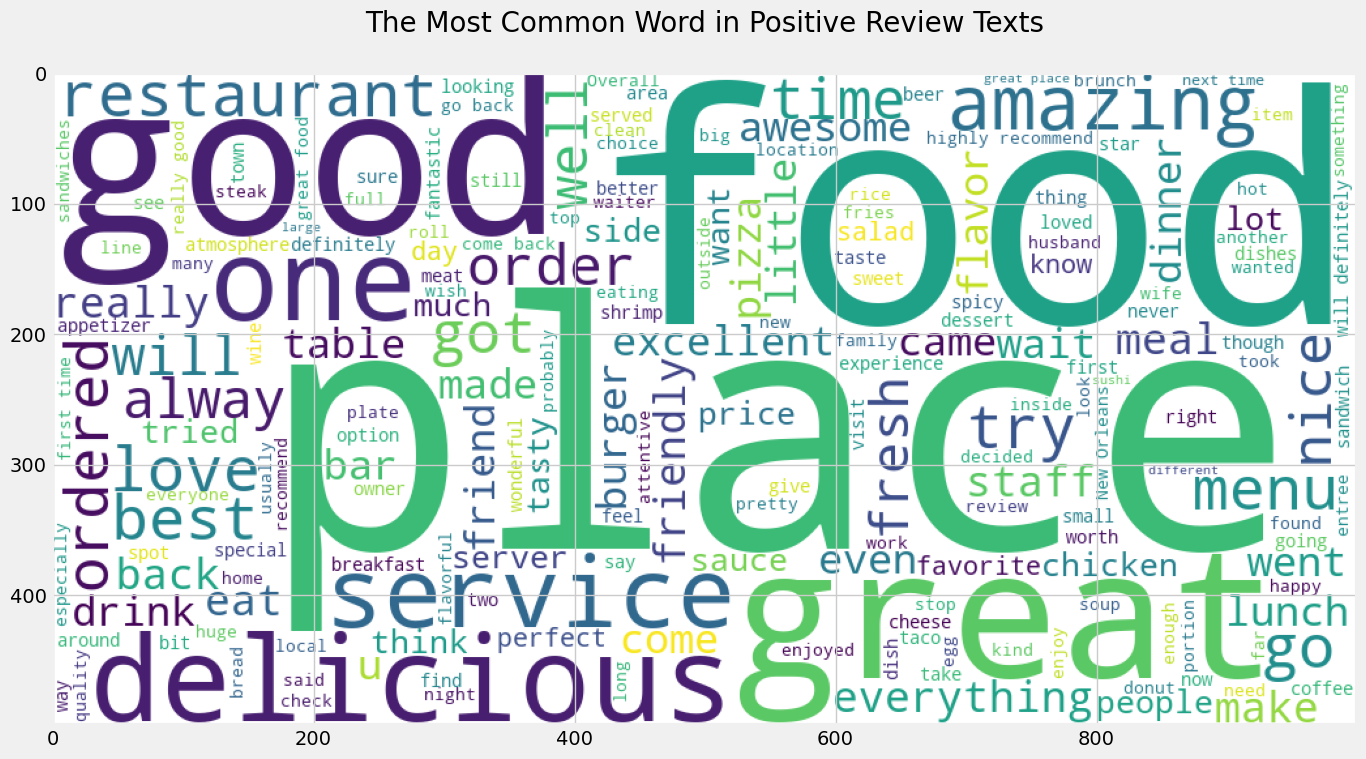

In [ ]:
# creating a word count plot for the positive reviews

# selecting only positive reviews is reveiws with 4 and above ratings
df=data.loc[ (data['rating']>=4)& (data['b/s_rating']>=4)] 

# clearing the plot figure
plt.figure(figsize=(15,15))            

plt.title('The Most Common Word in Positive Review Texts\n', fontsize=20)  # setting plot title

# creating the plot on only the most 200 words and setting the plot size
wc = WordCloud(max_words=200, min_font_size=10,height=500,width=1000,background_color="white")\
        .generate(' '.join(df['text'])) #create a WordCloud uding the text review column

plt.imshow(wc);

The word cloud visually represents the most common words found in the positive review texts, where the size of each word in the cloud corresponds to its frequency in the reviews. This provides an overview of the key terms and themes in positive reviews.
> Therefore from the plot above, the most occuring words in the positive reviews are words like , **good, food, place , great , delicious , great , service , amazing , best,..etc**. 

To create a word cloud visualization that highlights the most frequently occurring words in negative review texts from the Yelp dataset. By filtering and analyzing the text of negative reviews, the word cloud offers a visual representation of the common themes and frequently mentioned issues that contribute to a negative customer experience.

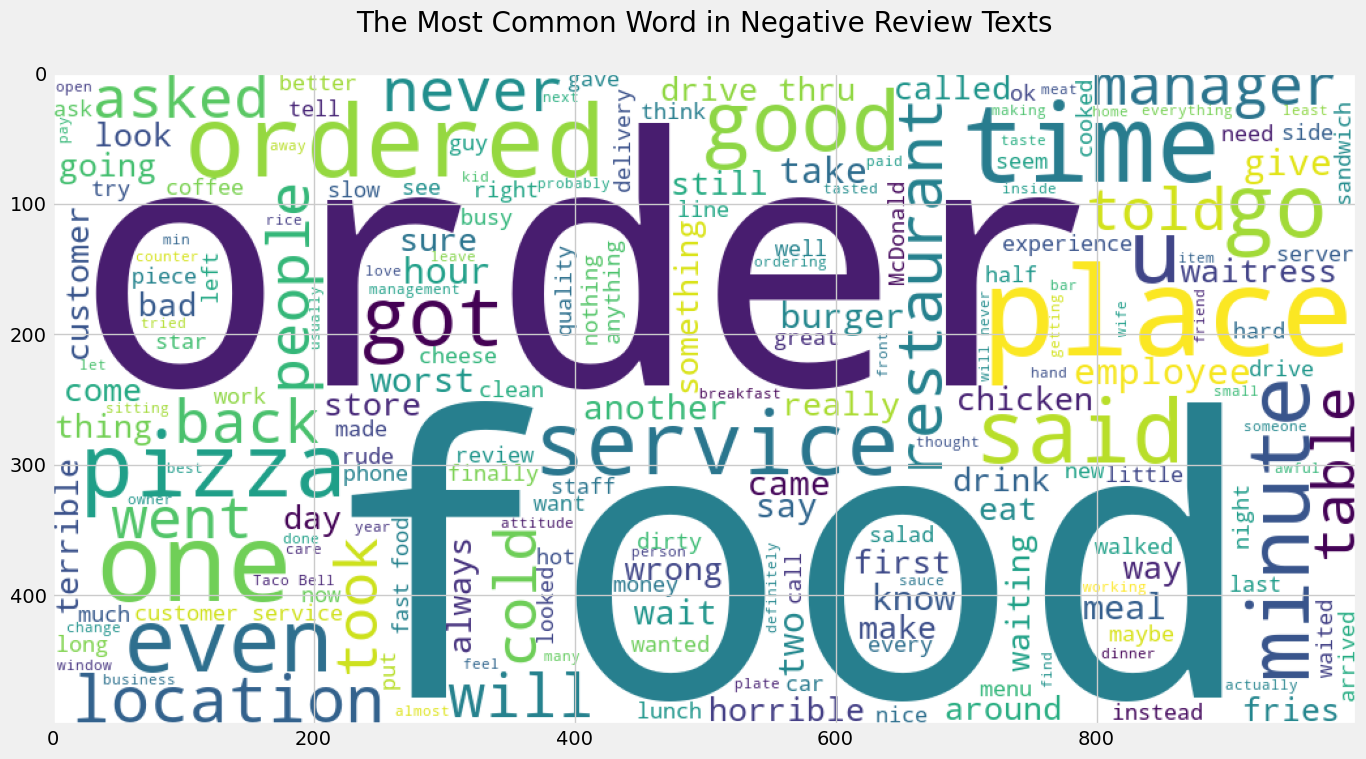

In [ ]:
# creating a word count plot for the positive reviews

# selecting only negative reviews i.e reveiws with 2 and below ratings
df=data.loc[ (data['rating']<=2)& (data['b/s_rating']<=2)]
plt.figure(figsize=(15,15))

# clearing the plot figure
plt.title('The Most Common Word in Negative Review Texts\n', fontsize=20)


# creating the plot on only the most 200 words and setting the plot size
wc = WordCloud(max_words=200,height=500,width=1000,background_color="white")\
        .generate(' '.join(df['text']))    #create a WordCloud uding the text review column

plt.imshow(wc);

This visualization provides valuable insights into the factors that may lead to poor reviews, helping to identify areas of improvement for businesses and assisting in understanding the aspects that negatively impact customer satisfaction on Yelp.
> Therefore from the plot above, the most occuring words in the negative reviews are words like , **minute , food, place , ordered, pizza, terrible, time, service, said ..etc**, these words are attributed to disatisfied customers and  issuence of bad /poor ratings to restautrants. When such words are encounterd there shoud be further investigation of the business service delivary for improvements.

### Interactive Map Visualization with Folium

The idea is to write a code that generates an interactive map using Folium, a Python library for creating leaflet maps. The map is centered at a specific latitude and longitude, which is determined by the first entry in the dataset. It then proceeds to populate the map with markers for selected businesses.

In [ ]:

# Set up center latitude and longitude
center_lat = data['latitude'][0]
center_long = data['longitude'][0]

# Initialize map with center lat and long
map_ =folium.Map([center_lat,center_long], zoom_start=5)

# Adjust this limit to see more or fewer businesses
limit=1000

for index in range(limit):
    # Extract information about business
    lat = data.loc[index,'latitude']
    long = data.loc[index,'longitude']
    name = data.loc[index,'name']
    rating = data.loc[index,'b/s_rating']
    location = data.loc[index,'location']
    details = "{}\nStars: {} {}".format(name,rating,location)
    
    # Create popup with relevant details
    popup = folium.Popup(details,parse_html=True)
    
    # Create marker with relevant lat/long and popup
    marker = folium.Marker(location=[lat,long], popup=popup)
    
    marker.add_to(map_)
    
map_

The result is an interactive map with markers representing businesses. When you click on a marker, a popup appears with details about the business, such as its name, rating, and location. This visualization provides a spatial perspective on the distribution of businesses in the dataset.

## Modelling

### Sentiment Analysis

Now the next step is to perform some text preprocessing steps which include:

- Feature engineering : futher feature engineering of the columns to meet the required specifications for analysis eg aggregating text reviews, creating new columns form the existing columns .. etc
- Removal of Punctuations and Removal of Stopwords - we'll make use of the **RegexpTokenizer()** method
-  Stemming - reducing words to their oot meaning , we'll use the **SnowballStemmer()** method
- Word-Vectorization - splitting text data into a vector of individual words for further and easier nlp analysis, we'll make use of the **TidfVectorizer()** method that vectorizes text data and calculates their respective Term Frequency - Inverse Document Frequency (TI-IDF) values.

Now let’s perform the above text preprocessing steps on the data:

#### Feature Engineering 
 
This feature engineering step helps prepare your data for analysis and modeling by selecting and transforming the most relevant attributes, which can lead to more effective modeling and improved insights for our project.
> We'll start by creating a new **review column** that aggregates all the text reviews partaining a single restaurant from all the users into one text.


In [ ]:
# creating a function that aggregates/combines all the extra reviews made to a particular restaurant into one text

def new_df(data):
    """
    The function takes in a dataframes and groups it by the business)id column then combines all the text values in the
    text column into one big text then assigns it to the review column
    
    """
    # drop duplicates based on business_id and reset the index
    df = data.drop_duplicates('business_id').reset_index(drop=True)
    
    # loop through unique business_id values
    for id in data.business_id.unique():
    # extract text for each unique business_id and explode it into separate rows
        text = data.loc[data.business_id == id, 'text'].explode(ignore_index=True)
    # join the exploded text into a single string
        text = ' '.join(text)
        
    # assign the concatenated text to the reviews column for the corresponding business_id
        df.loc[data.business_id == id, 'reviews'] = text
    
    return df

# call the function and create the new df
df = new_df(data)
df.head()  

,business_id,rating,text,name,latitude,longitude,b/s_rating,review_count,attributes,categories,hours,location,user_id,price,reviews
0,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,"If you decide to eat here, just be aware it is...",Turning Point of North Wales,40.210196,-75.223639,3.0,169,"{'NoiseLevel': ""u'average'"", 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'...","State:PA, City:North Wales, Address:1460 Bethl...",1,2,"If you decide to eat here, just be aware it is..."
1,YjUWPpI6HXG530lwP-fb2A,3.0,Family diner. Had the buffet. Eclectic assortm...,Kettle Restaurant,32.207233,-110.980864,3.5,47,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",Not-Available,"State:AZ, City:Tucson, Address:748 W Starr Pas...",3,1,Family diner. Had the buffet. Eclectic assortm...
2,kxX2SOes4o-D3ZQBkiMRfA,5.0,"Wow! Yummy, different, delicious. Our favo...",Zaika,40.079848,-75.025080,4.0,181,"{'Caters': 'True', 'Ambience': ""{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21...","State:PA, City:Philadelphia, Address:2481 Gran...",4,2,"Wow! Yummy, different, delicious. Our favo..."
3,e4Vwtrqf-wpJfwesgvdgxQ,4.0,Cute interior and owner (?) gave us tour of up...,Melt,29.962102,-90.087958,4.0,32,"{'BusinessParking': ""{'garage': False, 'street...","Sandwiches, Beer, Wine & Spirits, Bars, Food, ...","{'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '...","State:LA, City:New Orleans, Address:2549 Banks...",5,2,Cute interior and owner (?) gave us tour of up...
4,04UD14gamNjLY0IDYVhHJg,1.0,I am a long term frequent customer of this est...,Dmitri's,39.938013,-75.148131,4.0,273,"{'BusinessParking': ""{'garage': False, 'street...","Mediterranean, Restaurants, Seafood, Greek","{'Wednesday': '17:30-21:0', 'Thursday': '17:30...","State:PA, City:Philadelphia, Address:795 S 3rd...",6,2,I am a long term frequent customer of this est...


> We'll the create a new column called **attributes_true** by only extracting the true business attributes contained in the attributes column that has dictionary like entries

In [ ]:
# decompressing the attributes column into  new 'attributes_true' column

def decompress(x):
    """
    The function takes in a dictionary and returns only the keys that have their values not being False   
    """
      
    list_ = []
# evaluate the attributes column to convert it from a string to a dictionary
    data_dict = eval(x)
    
# iterate through the key-value pairs in the dictionary
    for key, val in data_dict.items():
# check if the key is in the specified categories and if the value is not "None"
        if (key in ['Ambience', 'GoodForMeal', 'BusinessParking']) and (val != "None"):
# if conditions are met, further iterate through sub-dictionary
            for key_, val_ in eval(data_dict[key]).items():
# if the sub-dictionary value is true, append it to the list
                if val_:
                    list_.append(f'{key}_{key_}')
        else:
# if the value is not false, append the key to the list
            if val != 'False':
                list_.append(key)
    
# join the list of selected attribute names into a space-separated string
    return " ".join(list_)

# create a new column 'attributes_true' in the df by applying the decompress function
# include a condition to handle cases where attributes is 'Not-Available'
df['attributes_true'] = df.attributes.apply(lambda x: decompress(x) if x != 'Not-Available' else ' ')


In [ ]:
# confirming if the new created column has performed as expected

print("Before:")
print(eval(df.attributes[0]))
print('\n After:')
df['attributes_true'][0]      # Print the result for the first row of 'attributes'

Before:
{'NoiseLevel': "u'average'", 'HasTV': 'False', 'RestaurantsAttire': "'casual'", 'BikeParking': 'False', 'Ambience': "{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': False, 'casual': True}", 'WiFi': "'free'", 'DogsAllowed': 'False', 'Alcohol': "'none'", 'BusinessAcceptsCreditCards': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'False', 'WheelchairAccessible': 'True', 'BusinessAcceptsBitcoin': 'False', 'RestaurantsTableService': 'True', 'GoodForKids': 'True', 'Caters': 'False', 'HappyHour': 'False', 'RestaurantsDelivery': 'True', 'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': False, 'brunch': True, 'breakfast': True}", 'OutdoorSeating': 'True', 'RestaurantsTakeOut': 'True', 'BusinessParking': "{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"}

 After:


'NoiseLevel RestaurantsAttire Ambience_casual WiFi Alcohol BusinessAcceptsCreditCards RestaurantsGoodForGroups RestaurantsPriceRange2 WheelchairAccessible RestaurantsTableService GoodForKids RestaurantsDelivery GoodForMeal_lunch GoodForMeal_brunch GoodForMeal_breakfast OutdoorSeating RestaurantsTakeOut BusinessParking_lot'

>From the above output we can see that the function has only retrieved keys that have their values not egual to 'False'

> - We will then merge the **attributes_true, categories, reviews** columns into one large text for each unique business and assign to a new column **details**

In [ ]:
# merging different columns to form one column of text 
df['details']=df[['attributes_true','categories','reviews']].apply(lambda x: ''.join(x), axis=1)

# previewing the first row value in the new column
df.details[0]

"NoiseLevel RestaurantsAttire Ambience_casual WiFi Alcohol BusinessAcceptsCreditCards RestaurantsGoodForGroups RestaurantsPriceRange2 WheelchairAccessible RestaurantsTableService GoodForKids RestaurantsDelivery GoodForMeal_lunch GoodForMeal_brunch GoodForMeal_breakfast OutdoorSeating RestaurantsTakeOut BusinessParking_lotRestaurants, Breakfast & Brunch, Food, Juice Bars & Smoothies, American (New), Coffee & Tea, SandwichesIf you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker. This is the second time we tried turning point at this loc

> After creating our desired column **details** , w'll then drop the columns that will not be usefull onwards

In [ ]:
# dropping columns
df.drop(columns=['attributes_true','reviews'], inplace=True)

From the text example above we can see that the column text contains many symbols, punctuations and stop word, next we shall remove the symbols and tokenize the column into a bag of words. These reasons serve to prepare text data for various text analysis and NLP tasks. It tokenizes the text, applies stemming, and standardizes the text for downstream processing, making it easier to analyze and extract meaningful information from the text.

In [ ]:
# firts create a pattern that strips all the no word characters from words during tokenization
pattern =r"(?u)\b\w\w+\b"

# instantiate the tokenizer
tokenizer = RegexpTokenizer(pattern)

# instantiating the stemmer
stemmer = SnowballStemmer(language="english")

# creating a function to tokenize and stem words
def stem_and_tokenize(list_):
    tokens = tokenizer.tokenize(list_)
    return [stemmer.stem(token) for token in tokens]

After instantiating the tokenizer and stemmer we then calculate the text frequency-inverse document frequency values using the  **TfidfVectorizer()** method. Calculating TF-IDF values is a crucial step in preparing text data for analysis and transforming it into a format suitable for many NLP and text mining tasks. It helps convert unstructured text into structured numerical data that can be used for various analytical and machine learning purposes.

In [ ]:
# instantiating the stop words
stopwords=stopwords.words('english')
# stemming the stopwords for uniformity during removing stopwords
stopwords=[ stemmer.stem(i) for i in stopwords]


tfidf = TfidfVectorizer( max_features=200 , 
                        stop_words=stopwords,
                        tokenizer= stem_and_tokenize
#                         ngram_range=(1, 2), 
#                         min_df=0, 
                        )


# fitting and transforming the details column to extract the top 200 features
tfidf_matrix=tfidf.fit_transform(df['details'])

# previewing the tfidf matrix
pd.DataFrame.sparse.from_spmatrix(tfidf_matrix, columns=tfidf.get_feature_names_out()).head()

C:\Users\User\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,also,alway,amaz,anoth,appet,area,around,ask,atmospher,attent,...,walk,want,way,well,went,wine,wonder,work,worth,would
0,0.030917,0.000000,0.033784,0.148950,0.000000,0.071060,0.00000,0.067906,0.000000,0.040761,...,0.000000,0.032251,0.068911,0.031813,0.033654,0.000000,0.000000,0.000000,0.037926,0.059517
1,0.075967,0.000000,0.000000,0.000000,0.000000,0.043651,0.00000,0.041713,0.046024,0.100155,...,0.046288,0.000000,0.042331,0.039084,0.041346,0.000000,0.000000,0.091133,0.000000,0.146242
2,0.030903,0.066009,0.067537,0.018610,0.022747,0.088784,0.05351,0.000000,0.018722,0.020371,...,0.000000,0.064471,0.017220,0.079496,0.084095,0.026438,0.020262,0.055608,0.056862,0.074362
3,0.061690,0.000000,0.000000,0.000000,0.000000,0.070894,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.068750,0.063478,0.067151,0.316666,0.000000,0.000000,0.000000,0.059378
4,0.046791,0.266525,0.068173,0.037571,0.091846,0.000000,0.00000,0.034257,0.000000,0.020563,...,0.000000,0.032539,0.034764,0.016049,0.050933,0.053375,0.102267,0.018711,0.038265,0.090075


The code is configuring and using a TF-IDF vectorizer to convert text data into a numerical representation that captures word importance, while stemming stopwords for uniformity. The warning message is related to an unused parameter and does not affect the execution of the code.

In [ ]:
# creating a matrix of the cosine similarities of the various rows based on the tidf scores
cosine_similarity=cosine_similarity(tfidf_matrix)
print("shape: ",cosine_similarity.shape)

# viewing the first column
cosine_similarity[0]

shape:  (3720, 3720)


array([1.        , 0.56019903, 0.52164205, ..., 0.50178735, 0.59844529,
       0.4746701 ])

The code is calculating the cosine similarity between the rows of the TF-IDF matrix (tfidf_matrix). The cosine similarity is a measure of similarity between two non-zero vectors in an inner product space, often used for text document similarity calculations. In this case, it's used to measure the similarity between the 'details' text descriptions of different businesses based on their TF-IDF scores.

> We will the pickle our desired data for deployment

In [ ]:


pickle.dump(tfidf_matrix, open('./data/tfidf_matrix.pkl', 'wb'))
pickle.dump(cosine_similarity, open('./data/cosine_similarity.pkl', 'wb'))
pickle.dump(df, open('./data/data.pkl', 'wb'))
print("Files saved...")

Files saved...


### Content-Based Restaurant Recommendation 

Using the cosine similarity matrix we will now create a content-based recommendation system that offers recommendations to users based on the restaurant names or text words representing the specifications of their desired restaurant and attributes.


> We use the cosine similarity matrix to compare similarity between different restaurants and the customers prefrences, then pick the top n similar restaurants to recommend based on his/her input. 

In [ ]:
# creating a folium_map function that displays restaurant lovations

def folium_map(data):
    """
    The function takes in a dataframe and using the latitude and longitude columns displays a map showing the locations of 
    all the restaurants avaible in the input data
    """
    # reseting the index in the input dataframe
    dff=data.reset_index(drop=True)


# Set up center latitude and longitude
    center_lat = dff['latitude'][0]
    center_long = dff['longitude'][0]

# Initialize map with center lat and long
    map_ =folium.Map([center_lat,center_long], zoom_start=7)

# Adjust this limit to see more or fewer businesses
    limit=dff.shape[0]
    print(f"{limit} Resturant Locations")
    for index in range(limit):
        # Extract information about business
        lat = dff.loc[index,'latitude']
        long = dff.loc[index,'longitude']
        name = dff.loc[index,'name']
        rating = dff.loc[index,'b/s_rating']
        location = dff.loc[index,'location']
        details = "{}\nStars: {} {}".format(name,rating,location)

# Create popup with relevant details
        popup = folium.Popup(details,parse_html=True)

# Create marker with relevant lat/long and popup
        marker = folium.Marker(location=[lat,long], popup=popup)

        marker.add_to(map_)

    return display(map_)  # returning a map display

In [ ]:
folium_map(data=df.loc[:10])

11 Resturant Locations


The content_based function uses content-based recommendation techniques to provide restaurant recommendations based on user input preferences, restaurant names, or user-defined text. The recommendations can be filtered by minimum rating and location and are visually presented on an interactive map if specified.

In [ ]:
def content_based(df=df, name:str= None , rating:int =1, num:int=5, text: str=None, location:str = None):
    """
    The function takes the following input;
    
    df: DataFrame - a dataframe containing unique rseturants
    name: str - name of restaurant to recomend similar restaurants
    num:int - number of restaurants to recommend
    location: string - prefered location
    rating: string - prefered rating of restaurant
    text: - User prefrencese inform of text
    
    Then based on the input parameters offers similar retaurants according to the input parameters to users
    """
    
    if name:
        index_=df.loc[df.name== name].index[0]                          # find the index of the input name
        sim=list(enumerate(cosine_similarity[index_]))                  # extract similarity vector of that name index
        sim=sorted(sim, key=lambda x: x[1], reverse=True)[1:num+1]      # arrange the vector values in ascending order
        indices= [i[0] for i in sim]                                    # Extract the indices of the top high scores
        print(f"Top {num} Restaurants Like [{name}]")
        
        # if the location parameter is passed then the dataframe is filtered based on the input location
        if location:                                                
            df=df.loc[ (df['b/s_rating']>=rating) & ( df.location.str.contains(location))]
            folium_map(df)
        else: 
            df= df.loc[ (df['b/s_rating']>=rating) ] 
        # filtering the data based on the selected indices    
        df=df.loc[indices,('name','b/s_rating','review_count','location')].sort_values('b/s_rating', ascending=False)
        return  df.reset_index(drop=True)
    
    # if the name is None then switch to other parameters
    else:
        # if the text has a passed input values then this if statement runs            
        if text: 
                text=text.lower()                                           # converting the text into lowercase
                tokens=stem_and_tokenize(text)                              # tokenizing and stemming the words
                tokens=[ word for word in tokens if word not in stopwords]  # removing stopwords
                text_set=set(tokens)                                        # taking only unique words
                
                if location: # using entered location to filter the data
                    df=df.loc[ (df.location.str.contains(location)) & (df['b/s_rating']>=rating)].reset_index(drop=True)

                vectors=[] # creating an emplty list to append the intersection values
                for words in df.details:                                     # looping over the text in the details column
                    words=words.lower()                                      # lowering the text
                    words=stem_and_tokenize(text)                            # tokenizing and stemming the words
                    words=[ word for word in tokens if word not in stopwords] # removing stopwords
                    words=set(words)                                         # taking only unique words
                    vector=text_set.intersection(words)                      # checking for intersection with entered text 
                    vectors.append(len(vector))                              # appending value to vectors list
                    
                vectors=sorted(list(enumerate(vectors)), key= lambda x: x[1], reverse=True)[:num] # sorting the list in desc
                indices= [i[0] for i in vectors]                                         # selecting indecies of top values
                print(f"Top {num} Best Resturants Based on entered text:")
                # using the indices fileter the dataframe 
                df=df.loc[indices].sort_values(by=['b/s_rating','review_count'],ascending=False)
                if location: folium_map(df)                                   # calling the folim_map of the selected values
                return df[['name','b/s_rating','review_count','location']].reset_index(drop=True)    # offering recommendatons
        
        # the if only location is entered as a parameter then the top businesses in that location are recommended
        if location:
            df=df.loc[ df.location.str.contains(location)& (df['b/s_rating']>=rating)] #filtering dataframe
            df=df.sort_values(['review_count','b/s_rating'])[:num]     # sorting in descending order
            folium_map(data=df)
            return df[['name','b/s_rating','review_count','location']].reset_index(drop=True) # offering recommendations
         
        # if both the name, text and location are None the most popular restarants are recommended
        else:                
            df=df.loc[data['b/s_rating']>=rating].sort_values(by=['review_count','b/s_rating'],ascending=False)[:num]
            if location: folium_map(data=df)
            print("Most Popular Restaurants")
            return df[['name','b/s_rating','review_count','location']].reset_index(drop=True)
    
    

In [ ]:
# running the recommender on default parameters
content_based()

Most Popular Restaurants


,name,b/s_rating,review_count,location
0,Luke,4.0,4554,"State:LA, City:New Orleans, Address:333 Saint ..."
1,Santa Barbara Shellfish Company,4.0,2404,"State:CA, City:Santa Barbara, Address:230 Stea..."
2,Prep & Pastry,4.5,2126,"State:AZ, City:Tucson, Address:2660 N Campbell..."
3,Surrey's Café & Juice Bar,4.5,2084,"State:LA, City:New Orleans, Address:1418 Magaz..."
4,Mr. B's Bistro,4.0,2064,"State:LA, City:New Orleans, Address:201 Royal St"


In [ ]:
# offering recommndations based on a specific location
content_based(location='Philadelphia')

5 Resturant Locations


,name,b/s_rating,review_count,location
0,Papa John's Pizza,1.5,5,"State:PA, City:Philadelphia, Address:1555 Wads..."
1,New Napoli Famous Pizza,2.0,5,"State:PA, City:Philadelphia, Address:911 Tyson..."
2,Amato's Deli Restaurant,2.5,5,"State:PA, City:Philadelphia, Address:3000 S Sy..."
3,Venuto's Old World Pizza,3.0,5,"State:PA, City:Philadelphia, Address:6024 Ridg..."
4,Philly Dawgz,4.0,5,"State:PA, City:Philadelphia, Address:3240 N Br..."


In [ ]:
# recommending similar restaurants to the entered name
content_based( name="Backspace Bar & Kitchen")

Top 5 Restaurants Like [Backspace Bar & Kitchen]


,name,b/s_rating,review_count,location
0,Black Palm Restaurant,4.5,11,"State:FL, City:St. Petersburg, Address:1700 Pa..."
1,Independence Brew Pub,4.5,5,"State:PA, City:Philadelphia, Address:1150 Filb..."
2,Union Station Pub & Grill,4.0,9,"State:LA, City:New Orleans, Address:735 St Jos..."
3,Fellini Cafe of Media,4.0,508,"State:PA, City:Media, Address:106 W State St"
4,Dimaggio's Restaurant,2.5,12,"State:AB, City:Sherwood Park, Address:Not-Avai..."


In [ ]:
# recommending restaurants with attributes in the entered text
content_based( text="I want a clean restaurant with good desert and parking space and a romantic environment")

Top 5 Best Resturants Based on entered text:


,name,b/s_rating,review_count,location
0,Zaika,4.0,181,"State:PA, City:Philadelphia, Address:2481 Gran..."
1,Melt,4.0,32,"State:LA, City:New Orleans, Address:2549 Banks..."
2,Dmitri's,4.0,273,"State:PA, City:Philadelphia, Address:795 S 3rd..."
3,Kettle Restaurant,3.5,47,"State:AZ, City:Tucson, Address:748 W Starr Pas..."
4,Turning Point of North Wales,3.0,169,"State:PA, City:North Wales, Address:1460 Bethl..."


In [ ]:
# recommending restaurants with attributes in the entered text
content_based(rating=4, location="PA",num=10,\
        text="restaurant with crubs and sushi and a romantic setting and parking space. also the food should be delicious")

Top 10 Best Resturants Based on entered text:
10 Resturant Locations


,name,b/s_rating,review_count,location
0,Thai Place Restaurant,4.5,222,"State:PA, City:Phoenixville, Address:700 Nutt ..."
1,Chase's Hop Shop,4.5,116,"State:PA, City:Philadelphia, Address:7235 Risi..."
2,Zaika,4.0,181,"State:PA, City:Philadelphia, Address:2481 Gran..."
3,Dmitri's,4.0,273,"State:PA, City:Philadelphia, Address:795 S 3rd..."
4,Good Karma Cafe,4.0,249,"State:PA, City:Philadelphia, Address:928 Pine St"
5,Portobello Cafe,4.0,137,"State:PA, City:Eddystone, Address:1423 Chester..."
6,The Coventry Deli,4.0,65,"State:PA, City:Philadelphia, Address:2000 Mark..."
7,Village Whiskey,4.0,1553,"State:PA, City:Philadelphia, Address:118 S 20t..."
8,Termini Bros Bakery,4.0,263,"State:PA, City:Philadelphia, Address:12th St &..."
9,Limoncello Ristorante & Caterers,4.0,483,"State:PA, City:West Chester, Address:9 N Walnu..."


#### Collaborative filtering

Here the tasks related to building a collaborative filtering recommendation system using the Surprise library are undertaken for collaborative filtering by selecting the relevant columns, importing the Surprise library, initializing a Reader object to specify the data format, and then loading the data into a Surprise Dataset object for further analysis and model building.

> Now, we will compare the different neighborhood-based models and see which ones perform best based on the RMSE metric, the afterwards compare the based neighborhood-based model with the model-based models and pick the best model.


In [ ]:
#selecting specific columns that are relevant for collaborative filtering
new_df = data[['user_id', 'business_id', 'rating']] 
reader = Reader()
data_2 = Dataset.load_from_df(new_df,reader)

In [ ]:
dataset = data_2.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of Restaurants: ', dataset.n_items)

Number of users:  34497 

Number of Restaurants:  3720


> Fisrt , we will model a baseline SVD() model using the default parameters.

In [ ]:
# instantating the SVD model
svd = SVD()

# using cross-validate to get the test rmse scores for 5 splits
results=cross_validate(svd, data_2, cv=5, n_jobs=-1)


for values in results.items():
    print(values)
print("-------------------------")
print("Mean RMSE: ",results['test_rmse'].mean())

('test_rmse', array([1.25894871, 1.25913238, 1.26349775, 1.24588354, 1.25487924]))
('test_mae', array([1.01358348, 1.00907167, 1.01265276, 1.0074843 , 1.01268102]))
('fit_time', (2.014453887939453, 2.000645399093628, 2.1281423568725586, 1.8492746353149414, 0.8209562301635742))
('test_time', (0.258831262588501, 0.28508758544921875, 0.10673904418945312, 0.09496593475341797, 0.08252310752868652))
-------------------------
Mean RMSE:  1.2564683243349886


The first baseline model-based model with an RMSE of 1.256 same as our best neighborhood based model which had a RMSE of 1.257. Using the GridSearchCv we will tune the SVD model inorder to improve the training RMSE scores.

In [ ]:
# define a dictionary params with hyperparameter values to be tested
params = {'n_factors': [20, 50, 100], # number of factors for matrix factorization
         'reg_all': [0.02, 0.05, 0.1]} # regularization term
# create a GridSearchCV object 'g_s_svd' for hyperparameter tuning
g_s_svd = GridSearchCV(SVD,param_grid=params,n_jobs=-1) # specify the algorithm (SVD) to be tuned
# fit the GridSearchCV object to the data to find the best hyperparameters
g_s_svd.fit(data_2)


Here we perform hyperparameter tuning for the SVD collaborative filtering model using grid search and cross-validation. It tests different values of the number of latent factors (n_factors) and the regularization term (reg_all) to find the combination that results in the best model performance. The final best hyperparameters can be accessed from the g_s_svd object for use in the model.

In [ ]:
print(g_s_svd.best_score)
print(g_s_svd.best_params)

{'rmse': 1.2552059235298247, 'mae': 1.0087102519855444}
{'rmse': {'n_factors': 20, 'reg_all': 0.02}, 'mae': {'n_factors': 20, 'reg_all': 0.02}}


The RMSE value for the optimized SVD model is approximately 1.25, indicating the model's average prediction error in terms of user ratings. Lower RMSE values are desirable as they signify better predictive accuracy.                              
The MAE value for the optimized SVD model is approximately 1.01, representing the average absolute difference between predicted and actual user ratings. A lower MAE indicates improved prediction accuracy.                                            
The best-performing hyperparameter values are as follows:                       
1) For RMSE, the optimal hyperparameters are 'n_factors' = 20 and 'reg_all' = 0.05.
2) For MAE, the optimal hyperparameters are 'n_factors' = 20 and 'reg_all' = 0.02.   
These results indicate that the SVD collaborative filtering model, when configured with these hyperparameters, provides a relatively low prediction error and is well-suited for making personalized recommendations based on user ratings.

In [ ]:
# created an instance of the SVD model with specified hyperparameters
svd = SVD(n_factors= 20, reg_all=0.02)
# fit the SVD model to the dataset
svd.fit(dataset)

The code we just did initializes an SVD model with specific hyperparameters and then trains the model on the provided dataset. The trained SVD model can be used for various tasks, such as making personalized recommendations based on user-item interactions.

In [ ]:
# using the model them we try and make a rating prediction of user 15, on restaurant with id "Pns2l4eNsfO8kk83dixA6A"
svd.predict("15", "Pns2l4eNsfO8kk83dixA6A")

Prediction(uid='15', iid='Pns2l4eNsfO8kk83dixA6A', r_ui=None, est=3.8106472771647937, details={'was_impossible': False})

> First before creating a collaborative filtering function, we will first create a funtion **restaurant_rater()** that suggest resturants to users for them to input their rating inorder based on the entered rating to offer recommendations using the SVD model since it cannot offer recommendations when the user has no data in the database (cold start problem) 

In [ ]:
# define a function named 'restaurant_rater' that takes user inputs to rate restaurants

def restaurant_rater(data=df,num:int=3, location:str =None, category:str =None):
    
    """
    The functions takes the following inputs:
    data: DataFrame - a dataframe containing only rows of the unique business 
    num: int - number of ratings
    location: string - prefered location
    category: string - prefered category of restaurant
    
    Then randomly draws a restaurant names from the dataframe for the user to rate
    """
    
    df_restaurant=data
    #assigning the rating user a user_id
    user_id=df_restaurant.user_id.max()+1                                               

    rating_df = pd.DataFrame()   # create an empty dataframe to store user rated restaurants
    # continue the loop until the desired num is collected
    while num > 0:
        # select a random restaurant that matches the specified location
        if location: 
            restaurant = df_restaurant[df_restaurant['location'].str.contains(location)].sample(1)
         # select a random restaurant that matches the specified category    
        elif category:
            restaurant = df_restaurant[df_restaurant['categories'].str.contains(category)].sample(1)
        else:  # or else selects a random restaurant
            restaurant = df_restaurant.sample(1)
        # prints the selected restaurant    
        print(tabulate(restaurant[['name','b/s_rating','categories']], headers='keys', tablefmt='fancy_grid', showindex=False))
        # asks for rating from user
        rating = input("How do you rate this restaurant on a scale of 1-5, Enter: ")
        
        # creating a function that checkes the validity of the entered rating ie should be bewteen 1-5
        def checker(rating):
            if (len(rating)!= 0):
                while (float(rating)>5) :
                    print("Enter valid rating, scale of 1-5 or Enter")  
                    rating= input()
                return rating
            else: return rating
            
        # calling the function to confirm the selected rating 
        rating = checker(rating)
        if len(rating) == 0:                                        # if no rating is entered 
            num-=1                                                  # the jumps to select another restaurant
            continue
        else:
            restaurant.loc[:,('user_id')]= user_id                   # then the selected restaurant is assigned the user id
            restaurant.loc[:,('rating')]= rating
            rating_df=pd.concat([rating_df,restaurant], axis=0)   # the movie is added to our new user rated dataframe
            num-=1                                                  # then another restaurant is suggested till num==0
            # return the list of user ratings and restaurant information
    return rating_df

This function above allows a user to interactively rate restaurants by providing their ratings for a specified number of restaurants, and it collects this information in a list for further analysis or use in a recommendation system. The code also considers the restaurant category for selecting restaurants to rate if a category is provided.

In [ ]:
# rating 4  restaurants that have sbadwiches in their menu
restaurant_rater( num=4, category='Sandwiches')

╒════════╤══════════════╤════════════════════════════════════╕
│ name   │   b/s_rating │ categories                         │
╞════════╪══════════════╪════════════════════════════════════╡
│ Subway │          2.5 │ Sandwiches, Restaurants, Fast Food │
╘════════╧══════════════╧════════════════════════════════════╛
How do you rate this restaurant on a scale of 1-5, if you haven't watched Enter: 3
╒═══════════════════╤══════════════╤═════════════════════════════════════════════════════════════════════════════════════════════╕
│ name              │   b/s_rating │ categories                                                                                  │
╞═══════════════════╪══════════════╪═════════════════════════════════════════════════════════════════════════════════════════════╡
│ Fuzzy's Taco Shop │            3 │ Sports Bars, Breakfast & Brunch, Mexican, Nightlife, Tex-Mex, Restaurants, Sandwiches, Bars │
╘═══════════════════╧══════════════╧══════════════════════════════════════════

,business_id,rating,text,name,latitude,longitude,b/s_rating,review_count,attributes,categories,hours,location,user_id,price,details
2336,XF86J5bJKkmueBL-PmPbcg,3,I have been here a bunch of times.. It's alway...,Subway,39.742468,-75.576237,2.5,7,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sandwiches, Restaurants, Fast Food",Not-Available,"State:DE, City:Wilmington, Address:1012 Wilmin...",46187,1,BusinessAcceptsCreditCards RestaurantsTakeOut ...
2205,_HcAoG6Jj_XTj4-XNEbo6Q,3,Great to have a new spot in Temple Terrace. Fo...,Fuzzy's Taco Shop,28.053329,-82.392815,3.0,172,"{'OutdoorSeating': 'True', 'BusinessAcceptsCre...","Sports Bars, Breakfast & Brunch, Mexican, Nigh...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ...","State:FL, City:Tampa, Address:5621 E Fowler Av...",46187,1,OutdoorSeating BusinessAcceptsCreditCards Rest...
3021,zSsdeiHfEnv_EVv8IVqcWg,2,Kameron just helped us tonight and he was rude...,eegee's,32.350430,-110.975832,3.0,57,"{'RestaurantsGoodForGroups': 'True', 'NoiseLev...","Desserts, Restaurants, Fast Food, Sandwiches, ...","{'Monday': '0:0-0:0', 'Tuesday': '9:30-22:0', ...","State:AZ, City:Tucson, Address:7911 N Oracle Rd",46187,1,RestaurantsGoodForGroups NoiseLevel Alcohol Bu...
1707,M2m_SM9GpIbct2a_hOGzag,5,Another Nashville-area secret--just south of t...,Daily Dish Events & Catering,35.998157,-86.886735,4.0,47,"{'WiFi': ""u'free'"", 'RestaurantsPriceRange2': ...","American (Traditional), Event Planning & Servi...","{'Monday': '11:0-19:0', 'Tuesday': '11:0-19:0'...","State:TN, City:Franklin, Address:2205 Hillsbor...",46187,2,WiFi RestaurantsPriceRange2 HasTV BusinessPark...


In [ ]:
# rating ratsurants from PA
restaurant_rater(location='PA')

╒═══════════╤══════════════╤════════════════════════════════════════════╕
│ name      │   b/s_rating │ categories                                 │
╞═══════════╪══════════════╪════════════════════════════════════════════╡
│ Pizza Hut │          1.5 │ Italian, Chicken Wings, Restaurants, Pizza │
╘═══════════╧══════════════╧════════════════════════════════════════════╛
How do you rate this restaurant on a scale of 1-5, if you haven't watched Enter: 2
╒════════════════╤══════════════╤═══════════════════════════════════════════════╕
│ name           │   b/s_rating │ categories                                    │
╞════════════════╪══════════════╪═══════════════════════════════════════════════╡
│ Domino's Pizza │            2 │ Pizza, Chicken Wings, Restaurants, Sandwiches │
╘════════════════╧══════════════╧═══════════════════════════════════════════════╛
How do you rate this restaurant on a scale of 1-5, if you haven't watched Enter: 3
╒════════════════════════╤══════════════╤═════════════

,business_id,rating,text,name,latitude,longitude,b/s_rating,review_count,attributes,categories,hours,location,user_id,price,details
1973,T8lxi3V2avTVXCanVkAFNg,2,Definitely should have read the reviews first....,Pizza Hut,39.913055,-75.149704,1.5,25,"{'RestaurantsDelivery': 'True', 'Alcohol': ""u'...","Italian, Chicken Wings, Restaurants, Pizza","{'Monday': '12:0-22:0', 'Tuesday': '12:0-22:0'...","State:PA, City:Philadelphia, Address:2715 S Fr...",46187,1,RestaurantsDelivery Alcohol RestaurantsTakeOut...
3423,CldkS_vTY-vQKYw3LPXpuw,3,The pizza was undercooked bottom line. I order...,Domino's Pizza,40.027505,-75.209458,2.0,40,"{'Ambience': ""{'touristy': False, 'hipster': F...","Pizza, Chicken Wings, Restaurants, Sandwiches","{'Monday': '10:30-1:0', 'Tuesday': '10:30-1:0'...","State:PA, City:Philadelphia, Address:5711 Ridg...",46187,1,RestaurantsPriceRange2 RestaurantsDelivery Bus...
2750,ld1b8y_PHH6Mn_e7T0u04g,2,Good quality ingredients! Poke bowl was a huge...,Gachi Sushi and Noodle,39.894612,-75.229295,4.0,95,"{'OutdoorSeating': 'False', 'RestaurantsReserv...","Noodles, Japanese, Restaurants, Sushi Bars","{'Monday': '5:0-22:0', 'Tuesday': '5:0-22:0', ...","State:PA, City:Philadelphia, Address:8500 Essi...",46187,2,WiFi Ambience_casual RestaurantsTakeOut Alcoho...


> With the defined rated() function, we proceed to create a collaborative filtering function  while using our SVD model. The the function when the user has not entered any  rating to the suggested rsetaurants (cold start problem). Then the function will recommend using the content-based system, solving the cold start problem.

In [ ]:
def cf_model(df=df,num:int=3, location:str=None, name=None , text=None):
    """
    The function takes the following inputs;
    
    df: DataFrame - a dataframe containing unique rseturants
    name: str - name of restaurant to recomend similar restaurants
    num:int - number of restaurants to recommend
    location: string - prefered location
    category: string - prefered category of restaurant
    text: - User prefrencese inform of text
    
    The function the takes user ratings and appends then to the dataframe then fits this new dataframe to the SVD model
    Then predicts this users rating on all the restaurants in the dataframe then selects the top rating predictions and 
    recomends those restaurants
    """
    
    # calling the rater function for user to enter restaurant ratings
    user_ratings=restaurant_rater(num=num, location=location)
    
    # when the user ratings come back being blank, ie no ratings given ie cold start problem
    # then the content-based method is called, which then makes the recommendations
    if len(user_ratings)==0:
        return content_based(df=df,num=num,name=name,location=location,text=text,)
    
    # then add the user ratings to our df
    df=pd.concat([df,user_ratings],axis=0)

    # convert the new dataset into surprise format
    dataset = Dataset.load_from_df(df[['user_id','business_id','rating']],reader)
    
    # then fit the surprise data to the SVD
    svd = SVD(n_factors= 20, reg_all=0.02)
    svd.fit(dataset.build_full_trainset())
    
    # extract the user rating in the ratings dataframe
    user_id=user_ratings['user_id'].values[0]
    
    # select a random restaurant that matches the specified category
    if location: 
            df = df.loc[df['location'].str.contains(location)]
        
    #create an empty list to append the model predictions
    user_predictions=[]
    
    # loopin over all the unique restaurant ids in the dataframe and appending the predictions to user prediction list
    for  iid in df.business_id.unique():
        user_predictions.append( (iid , svd.predict(user_id, iid)[3]))
    
    # sorting the predictions in descending order of the predictions values
    top_pred = sorted(user_predictions , key =lambda x: x[1], reverse=True)
    
    # selecting the top 'num'(number of predictions) prediction indicies
    indices=[i[0] for i in top_pred[:num]]  
    
    #using the extracted indices them extract the resturant titles
    rec = df.loc[ df['business_id'].isin(indices)].sort_values('b/s_rating', ascending=False)
    display(folium_map(rec))
    
    #then retun the resturants details to user
    return rec[['name','b/s_rating','location']].reset_index(drop=True)  

In [ ]:
# based on default parameters
cf_model()

╒═══════════════╤══════════════╤═════════════════════════════════════════════════════════════╕
│ name          │   b/s_rating │ categories                                                  │
╞═══════════════╪══════════════╪═════════════════════════════════════════════════════════════╡
│ Lobster Haven │            4 │ Specialty Food, Seafood Markets, Seafood, Food, Restaurants │
╘═══════════════╧══════════════╧═════════════════════════════════════════════════════════════╛
How do you rate this restaurant on a scale of 1-5, if you haven't watched Enter: 4
╒════════════════════╤══════════════╤════════════════════════╕
│ name               │   b/s_rating │ categories             │
╞════════════════════╪══════════════╪════════════════════════╡
│ Island Breeze Cafe │          4.5 │ Caribbean, Restaurants │
╘════════════════════╧══════════════╧════════════════════════╛
How do you rate this restaurant on a scale of 1-5, if you haven't watched Enter: 4
╒═══════════════╤══════════════╤════════════

None

,name,b/s_rating,location
0,Firebirds Wood Fired Grill,3.5,"State:MO, City:St Charles, Address:1501 Beale St"
1,Skeeter's Pub,3.5,"State:NJ, City:Blackwood, Address:7 Coles Rd"
2,Szechuan Mandarin Chinese Restaurant,3.5,"State:PA, City:Elkins Park, Address:8080 Old Y..."
3,Skeeter's Pub,3.5,"State:NJ, City:Blackwood, Address:7 Coles Rd"


In [ ]:
# offering recommenations based on a sepecified location

cf_model(num=5,location='LA')

╒════════════════════════════╤══════════════╤════════════════════════════════════════════════════════════════════════════╕
│ name                       │   b/s_rating │ categories                                                                 │
╞════════════════════════════╪══════════════╪════════════════════════════════════════════════════════════════════════════╡
│ Cafe Hope's Green Dot Cafe │          4.5 │ Cafes, Restaurants, Internet Cafes, Coffee & Tea, Food, Breakfast & Brunch │
╘════════════════════════════╧══════════════╧════════════════════════════════════════════════════════════════════════════╛
How do you rate this restaurant on a scale of 1-5, if you haven't watched Enter: 4
╒════════════════════════════╤══════════════╤══════════════════════╕
│ name                       │   b/s_rating │ categories           │
╞════════════════════════════╪══════════════╪══════════════════════╡
│ Nacho Mama's Mexican Grill │          2.5 │ Mexican, Restaurants │
╘═════════════════════════

None

,name,b/s_rating,location
0,Taqueria La Coyota 2,5.0,"State:LA, City:New Orleans, Address:7300 Read ..."
1,Poseidon,4.0,"State:LA, City:New Orleans, Address:2100 Saint..."
2,Sassafras Restaurant,3.5,"State:LA, City:New Orleans, Address:2501 Leon ..."
3,Singha Thai Cafe,3.5,"State:LA, City:New Orleans, Address:413 Carond..."
4,Augie's Restaurant,3.5,"State:LA, City:Harahan, Address:6005 Jefferson..."
5,Sassafras Restaurant,3.5,"State:LA, City:New Orleans, Address:2501 Leon ..."


In [ ]:
# using the cf model to offer content based recommendations
# and not inputing any ratings on the suggected restaurants
cf_model(location='New Orleans',text="restaurant with delicious crubs and nice outdoor setting")

╒═════════════════════════════════╤══════════════╤════════════════════════════════════════════════╕
│ name                            │   b/s_rating │ categories                                     │
╞═════════════════════════════════╪══════════════╪════════════════════════════════════════════════╡
│ House of Blues Restaurant & Bar │            4 │ Restaurants, American (New), Burgers, Southern │
╘═════════════════════════════════╧══════════════╧════════════════════════════════════════════════╛
How do you rate this restaurant on a scale of 1-5, if you haven't watched Enter: 
╒═══════════════╤══════════════╤══════════════════════════════════════════════════════════════════╕
│ name          │   b/s_rating │ categories                                                       │
╞═══════════════╪══════════════╪══════════════════════════════════════════════════════════════════╡
│ Mena's Palace │            4 │ Restaurants, Southern, Cajun/Creole, Seafood, Breakfast & Brunch │
╘═══════════════╧═

,name,b/s_rating,review_count,location
0,Mr. B's Bistro,4.0,2064,"State:LA, City:New Orleans, Address:201 Royal St"
1,Creole House Restaurant & Oyster Bar,4.0,1594,"State:LA, City:New Orleans, Address:509 Canal St"
2,Melt,4.0,32,"State:LA, City:New Orleans, Address:2549 Banks..."


## Conclusion

In conclusion, this project has successfully achieved its main objective of developing an interactive and user-friendly restaurant recommendation system. This system not only provides personalized dining suggestions but also takes into account various factors that influence restaurant ratings and user preferences. The integration of an advanced recommendation algorithm ensures that users can access tailored restaurant recommendations, enhancing their overall dining experiences.

Throughout this project, we also met specific objectives. We designed and developed a user-friendly website, making it convenient for users to interact with our recommendation system. Additionally, we conducted in-depth analyses of the factors that significantly impact restaurant ratings and user preferences. This understanding was crucial in refining our recommendation algorithms, ensuring they provide valuable and relevant suggestions to users.

Furthermore, we harnessed the power of geographical data visualization using Folium. By creating interactive maps, we were able to explore geographic trends related to restaurant recommendations. These maps not only make our recommendations more engaging but also help users discover new dining experiences in their preferred locations.

In summary, this project's multifaceted approach aimed at delivering a holistic restaurant recommendation system has proven successful. Users can now access personalized dining recommendations, taking into account various influencing factors and geographical trends. This project not only achieves its specific objectives but also offers a valuable service that enhances the dining experiences of users.

## Recommendations 

Integration of user feedback: Actively seek and integrate user feedback to refine and improve the recommendation system

Enhanced user profiles: Use this data to provide more personalized restaurant recommendations.

Enhance recommendation algorithms: Continue to refine and enhance the recommendation algorithms. Explore more advanced machine learning techniques, including deep learning, to improve recommendation accuracy and personalization.

Expand geographical coverage: Gradually expand the geographical coverage of the recommendation system to include more regions and cities, providing users with a broader range of dining options.

## Future Improvement Ideas

Enhanced visuals: Incorporate images and visual content, such as restaurant photos and dishes, to make the recommendations more visually appealing and informative.

Community and social sharing: Encourage users to share their dining experiences and reviews within the system. Implement social sharing features to build a user community and facilitate restaurant recommendations from peers.

Real-time updates: Enable real-time updates of restaurant information, including opening hours, special offers, and menu changes. Users should receive the most current and accurate data.

Integration with food delivery services: Collaborate with food delivery services to allow users to place food orders for delivery or pickup directly through the recommendation system.

Advanced machine learning algorithms: Explore the use of advanced machine learning algorithms to further enhance recommendation accuracy.
